In [92]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [93]:
df1 = pd.read_csv("E:\\Desktop\\SLIIT\\Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [94]:
df1.shape

(13320, 9)

In [95]:
#getting a count of diffrent area types available
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

             bath   balcony     price
bath     1.000000  0.204201  0.456345
balcony  0.204201  1.000000  0.120355
price    0.456345  0.120355  1.000000


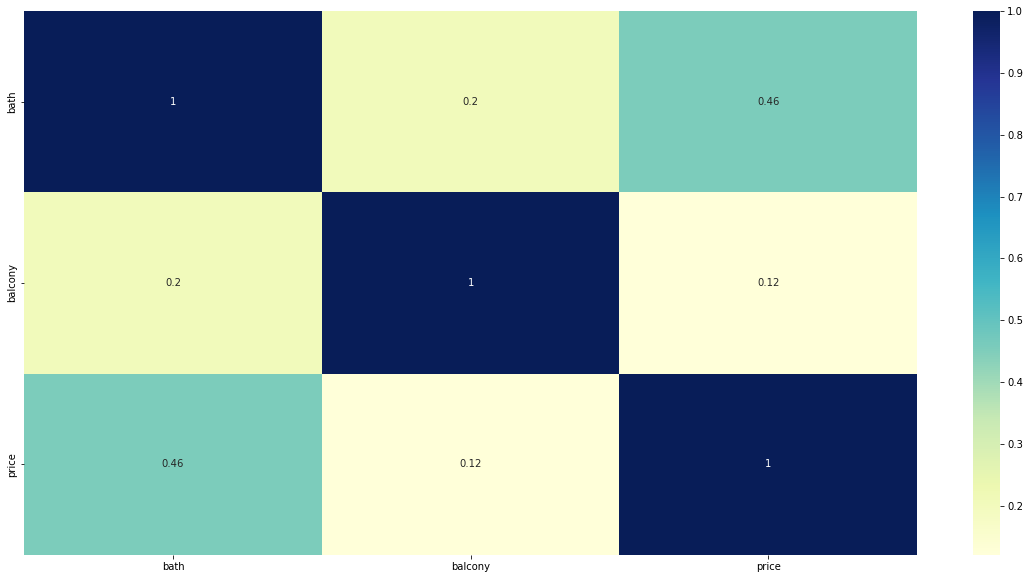

In [96]:
import seaborn as sns
#only numeric variables are compared
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df1.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [97]:
#dropping columns which do not have an impact on price 
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data Cleaning

In [98]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [99]:
#dropping null value rows
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [102]:
df3.shape

(13246, 5)

In [103]:
#unique values available in size feature
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [104]:
#creating a new column which only consists the # of bedrooms

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\Users\Imtiaz\AppData\Local\Temp/ipykernel_25260/1428603020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [105]:
#unique values present in bhk
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [106]:
#real estates which have more than 20 bedrooms compared with the total sq ft

df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [107]:
#unique values present in total sq.ft
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [108]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [109]:
#coverting the values given in a range to a finite number
df3[~df3['total_sqft'].apply(is_float)].head(10) #first 10 values given as a range

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [110]:
#we'll be converting the ranges to an average of the boundaries & ignore the rows which are given as "34.46Sq. Meter","4125Perch" etc
def convert_sqft_to_num(x):
  tokens  =x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [111]:
convert_sqft_to_num('2100-2850')



2475.0

In [112]:
convert_sqft_to_num('4125Perch') #returns none

In [113]:
df4= df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
print(df4.loc[30],'\n\n', df4.loc[410])


location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object 

 location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object


In [114]:
 df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


## Feature Engineering & Dimensionality Reduction

In [115]:
df5 = df4.copy()
#price_per_sqft feature is created for outlier detection
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [116]:
len(df5.location.unique())

1304

In [117]:
#no of properties available per location
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [118]:
#since we convert text data to dummy columns, we can't keep all the locations 
#high dimensionality problem
#solution- introduce 'other location' for locations with less than 10 properties
print("No of locations with less than 10 data points ",len(location_stats[location_stats<=10]))

No of locations with less than 10 data points  1052


In [119]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [120]:
len(df5.location.unique())

1293

In [121]:
#Applying transformation
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
print("No of locations available after dimensionality reduction ",len(df5.location.unique()))

No of locations available after dimensionality reduction  242


In [122]:
df5.head(10)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Outlier Detection and Removal 

In [123]:
#domain knowledge used for outlier detection and removal
#examining dataset to find outliers (threshold= 300 sq ft per bedroom)
print("properties where the square feet per bedroom is less than 300")
df5[df5.total_sqft/df5.bhk<300].head()

properties where the square feet per bedroom is less than 300


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [124]:
df5.shape

(13246, 7)

In [125]:
#removing the outliers which don't meet the threshold
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape


(12502, 7)

In [126]:
#checking price per sqft feature
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [127]:
# min price per sqft=Rs 267 , max price per sqft=Rs 176470
#function to remove these extreme values using standard deviation
#find mean and standard deviation for each location and filter out the data ponts which deviate from this

def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df= subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df7 = remove_pps_outliers(df6)
df7.shape


(10241, 7)

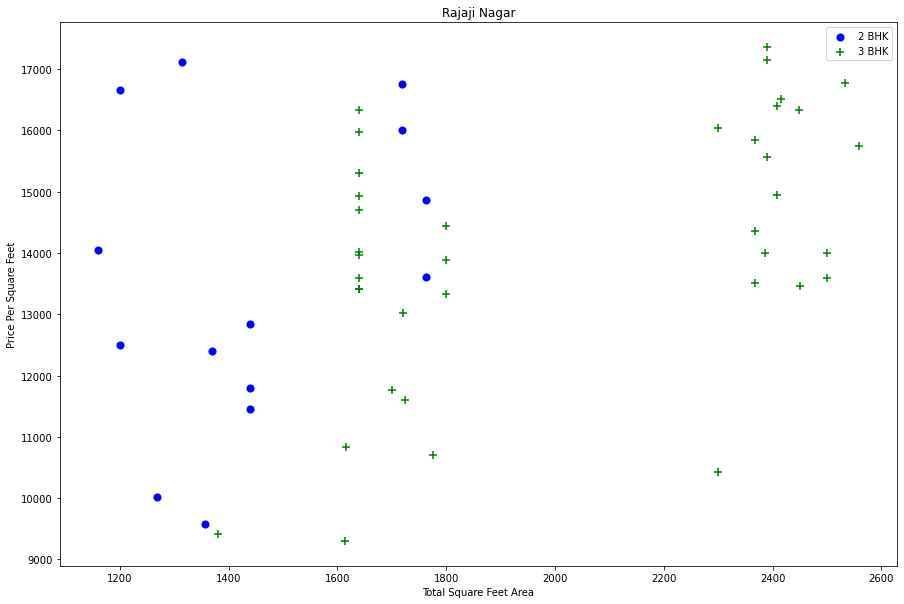

In [128]:
#same location; but the property price for 2 bedroom > 3 bedrooms
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+', color='green', label='3 BHK', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price Per Square Feet")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar")


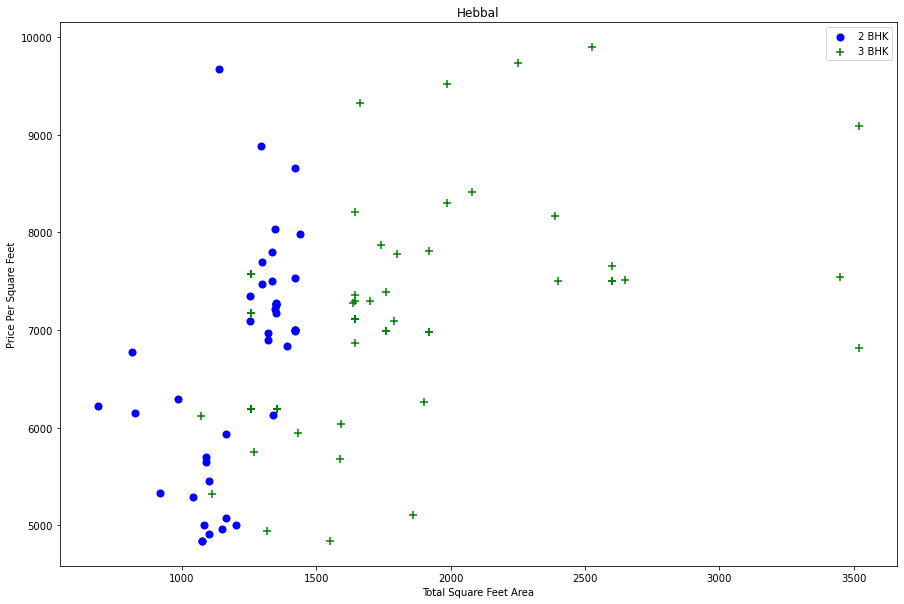

In [129]:
plot_scatter_chart(df7,"Hebbal")

In [130]:
#function to remove bhk outliers
#for each location; per bhk - calc mean std and count
#removing the datapoints which have price per sqft value less than the mean of a property with less bedroom than this
#if 1 bhk mean price_per_sqft = 1000 and 2 bhk price_per_sqft value = 500 then remove this particular data point

def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis="index")

In [131]:
df8 = remove_bhk_outliers(df7)
df8.shape


(7329, 7)

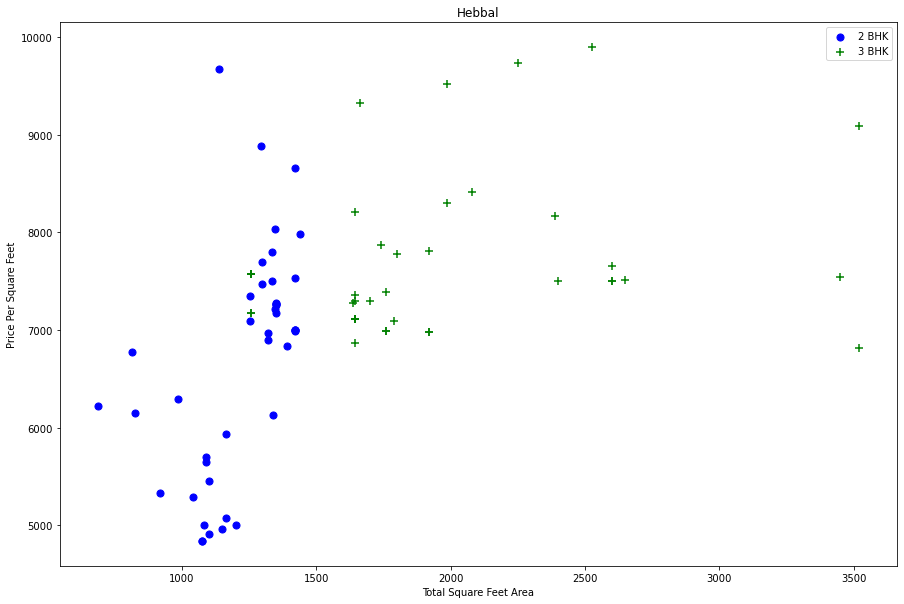

In [132]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

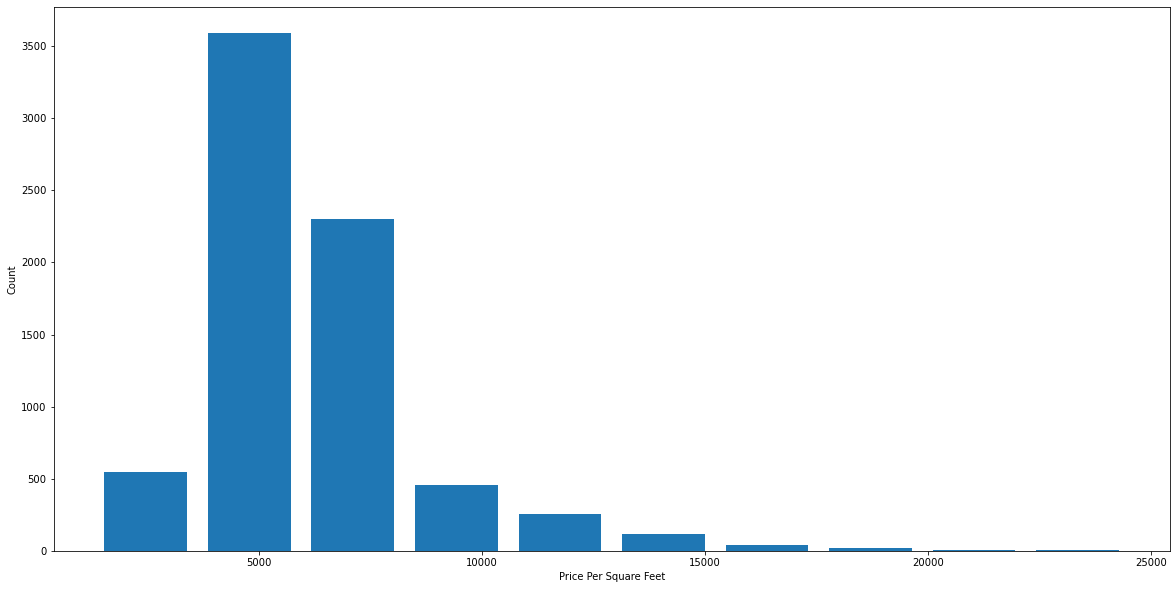

In [133]:
#no of properties per sqft area
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
#bell curve therefore normal distribution

In [134]:
#exploring bathroom feature
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [135]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

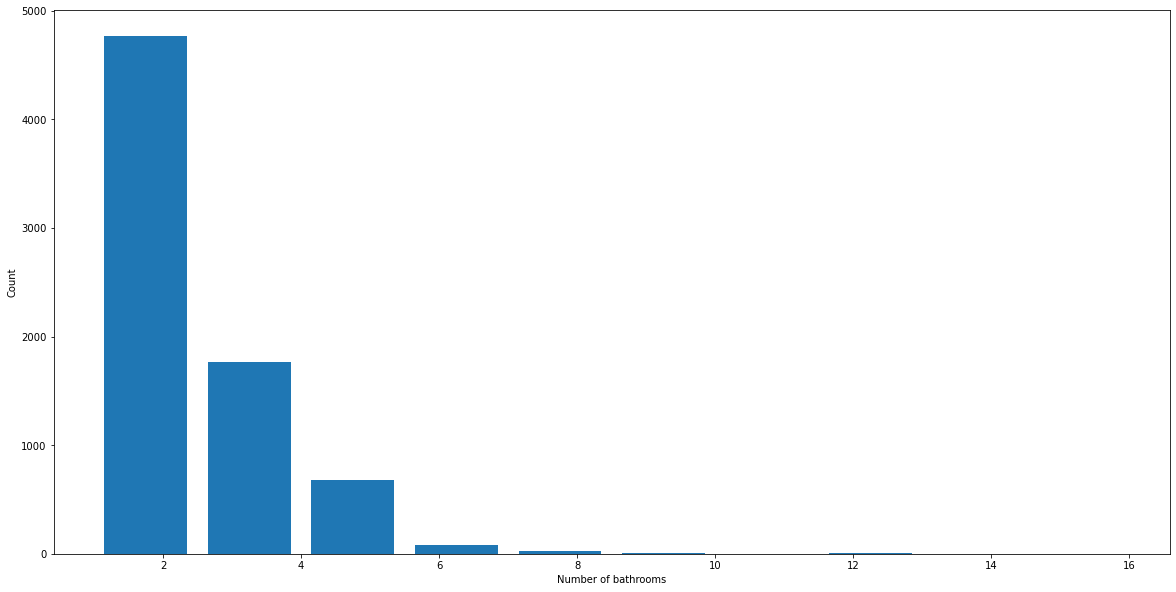

In [136]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [137]:
#no of bathrroms > no of bhk + 2 -> outlier
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [138]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [139]:
#dropping un necessary features
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [140]:

#text columns converted to numeric using pandas dummies
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
df12 = df11.drop('location', axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building 

In [143]:
df12.shape

(7251, 245)

In [144]:
#Independent variables
X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
#dependable variable
y = df12.price
print(y.shape)
y.head()


(7251,)


0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [155]:
#spliting dataset into training:testing (80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [147]:
#creating a linear regression model and determining the score
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8452277697874279

In [148]:
#creating a lasso model and determining the score
from sklearn.linear_model import Lasso
la_clf = Lasso()
la_clf.fit(X_train, y_train)
la_clf.score(X_test, y_test)

0.7237775279429011

In [149]:
#creating a dicision_tree model and determining the score
from sklearn.tree import DecisionTreeRegressor
dt_clf = DecisionTreeRegressor()
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.7299198404923151

In [150]:
y_predLR=lr_clf.predict(X_test)
y_predLaR=la_clf.predict(X_test)
y_predDTR=dt_clf.predict(X_test)

In [151]:
from sklearn.metrics import mean_squared_error
import math
print("Root mean squared error for \n")
print("linear regression model ",math.sqrt(mean_squared_error(y_test, y_predLR)))
print("lasso model ",math.sqrt(mean_squared_error(y_test, y_predLaR)))
print("decision_tree model ",math.sqrt(mean_squared_error(y_test, y_predDTR)))

# MSE: 2017904593.23
# RMSE: 44921.092965684235

Root mean squared error for 

linear regression model  27.98688967222029
lasso model  37.38846361322637
decision_tree model  36.97042610934512


## GridSearchCV for finding the best regression algorithm for the model

In [161]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit #to randomize sample
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

def find_best_model_using_gridsearch(X,y):
  algos = {
      'linear_regression' :{
          'model':LinearRegression(),
          'params':{
              'normalize':[True, False]
          }
      },
      'lasso':{
          'model':Lasso(),
          'params':{
              'alpha':[1, 2],
              'selection': ['random', 'cyclic']
          }
      },
       'SVR':{
          'model':SVR(),
          'params':{
              'C':[0.5,1.0, 1.5],
              'epsilon': [0.1, 0.2, 0.3]
          }
      },
      'decision_tree': {
          'model':DecisionTreeRegressor(),
          'params': {
              'criterion': ['mse', 'friedman_mse'],
              'splitter': ['best', 'random']
          }          
      }
  }
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score=False)
    gs.fit(X,y)
    scores.append({
        'model':algo_name,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_ 
    })
  return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])  

find_best_model_using_gridsearch(X,y)  

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687433,"{'alpha': 2, 'selection': 'random'}"
2,SVR,0.575956,"{'C': 1.5, 'epsilon': 0.3}"
3,decision_tree,0.727206,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


## K- fold cross validaion for evaluation

In [63]:
from sklearn.model_selection import ShuffleSplit #to randomize sample
from sklearn.model_selection import cross_val_score

In [64]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cv

ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None)

In [65]:
scores_lr = cross_val_score(LinearRegression(), X, y, cv = cv)
scores_lr

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [66]:
#mean of the scores
np.mean(scores_lr)

0.8183540750696233

In [67]:
scores_la = cross_val_score(Lasso(), X, y, cv = cv)
scores_la

array([0.6846968 , 0.68991129, 0.70381598, 0.64870183, 0.71001741])

In [68]:
np.mean(scores_la)

0.6874286616666976

In [69]:
scores_dt = cross_val_score(DecisionTreeRegressor(), X, y, cv = cv)
scores_dt

array([0.72173587, 0.57815638, 0.78900576, 0.68688844, 0.81938024])

In [70]:
np.mean(scores_dt)

0.7190333365259478

## overfitting

In [71]:
#function cross_val_prediction
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(LinearRegression(), X, y, cv = 3)
yhat[0:4]

array([235.08206119, 134.31442862, 148.01948956,  94.25392346])

In [72]:
#prediction using training data
yhat_train = lr_clf.predict(X_train)
yhat_train[0:4]

array([102.24604092, 234.68450509, 174.64648241,  44.80336942])

In [73]:
#prediction using testing data
yhat_test = lr_clf.predict(X_test)
yhat_test[0:4]

array([ 70.47896311,  33.09312356,  36.00433051, 106.10948304])

In [74]:
#libraries for plotting
from ipywidgets import interact, interactive, fixed, interact_manual

In [75]:
#function for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName,Title):
    width = 15
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Price - in indian rupees LKS')
    plt.ylabel('Proportion of houses')
    
    plt.show()
    plt.close()

In [76]:
#distribution of the predicted values of the training data
import seaborn as sns
import matplotlib.pyplot as plt

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


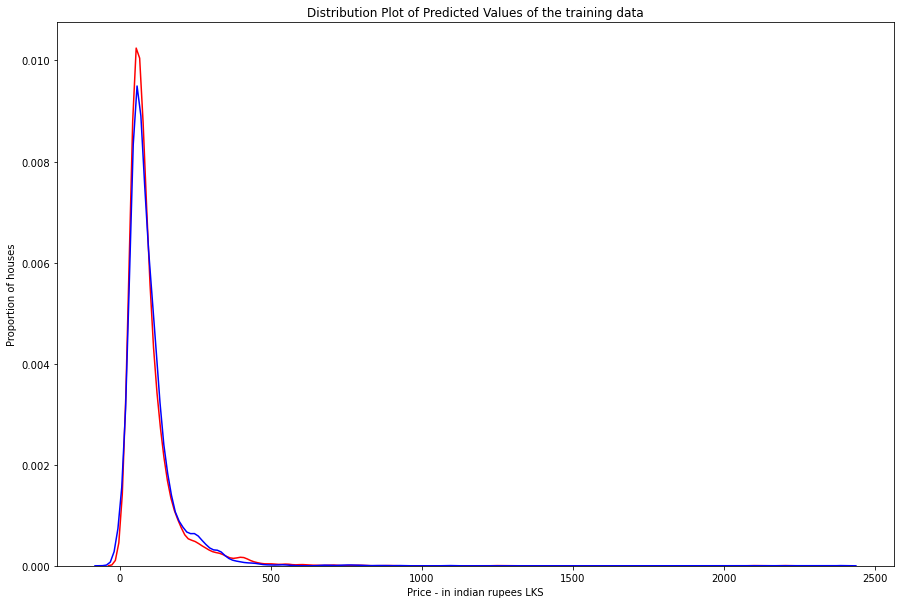

In [77]:
Title = 'Distribution Plot of Predicted Values of the training data'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)","Predicted Values (Train)", Title)

# Red line represents actual values for training data set.
# Blue line represents predicted values for training data set.

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


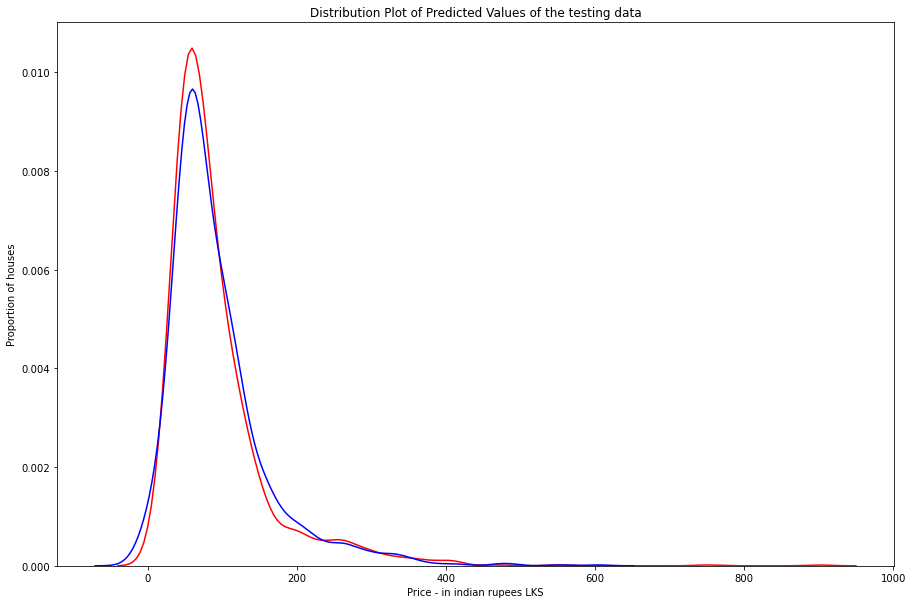

In [78]:
#distribution of the predicted values of the testing data
Title = 'Distribution Plot of Predicted Values of the testing data'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)","Predicted Values (Test)", Title)

# Red line represents actual values for testing data set.
# Blue line represents predicted values for testing data set.

In [79]:
#testing the prediction
#index of 2nd Phase Judicial Layout
np.where(X.columns== '2nd Phase Judicial Layout')[0][0]

5

In [80]:
def predict_price(location, sqft, bath, bhk):
  loc_index = np.where(X.columns==location)[0][0]


  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  if loc_index >= 0:
    x[loc_index] = 1
  return lr_clf.predict([x])[0]


In [81]:
print("location:1st Phase JP Nagar, 1000 sqft, 2 bathrooms, 2 bhk")
print("price in lakhs : ")
predict_price('1st Phase JP Nagar',1000, 2, 2)

location:1st Phase JP Nagar, 1000 sqft, 2 bathrooms, 2 bhk
price in lakhs : 


83.49904677167738

In [82]:
print("location:1st Phase JP Nagar, 1000 sqft, 3 bathrooms, 3 bhk")
print("price in lakhs : ")
predict_price('1st Phase JP Nagar',1000, 3, 3)

location:1st Phase JP Nagar, 1000 sqft, 3 bathrooms, 3 bhk
price in lakhs : 


86.80519395194304

In [83]:
print("location:Indira Naga, 1000 sqft, 2 bathrooms, 2 bhk")
print("price in lakhs : ")
predict_price('Indira Nagar', 1000, 2, 2)

location:Indira Naga, 1000 sqft, 2 bathrooms, 2 bhk
price in lakhs : 


181.27815484007036

In [84]:
#exporting mode to pickle file
import pickle 
with open('banglore_home_prices_model.pickle','wb') as f:
  pickle.dump(lr_clf, f)

In [85]:
#saving columns information
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w")as f:
  f.write(json.dumps(columns))